# Capstone Project - Car accident severity

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this problem we will try to predict the severity of an accident. Specifically, this report will target those **driving around Seattle**.

Since there are lots of accidents in Seattle we will try to detect **collisions that occur around the city**. We are also particularly interested in the **possibility of you getting into a car accident** and **how severe it would be**, so that you would drive more carefully or even change your travel if you are able to. 

## Data <a name="data"></a>

There are 37 variables in this dataset 
The target variable is defined as the severitycode. Further,the following codes correspond to the severity of the accident. 
* 3 — Fatality
* 2b — Serious injury
* 2 — Injury
* 1 — Property damage 
* 0 — Unknown 

Based on our problem, the attributes that will be used in our prediction of an accident include:
* a description of the weather conditions during the time of the collision 
* the condition of the road during the collision 
* the light conditions during the collision 

Following data sources will be needed to extract/generate the required information:
* All collisions provided by **Seattle Police Department** and recorded by Traffic Records. The timeframe for the data is from 2004 to present, and is updated weekly. 

### Data Understanding

Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data From CSV File


In [52]:
df = pd.read_csv("Data-Collisions.csv", low_memory = False)
print("Data Successfully loaded")
df.head()

Data Successfully loaded


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [53]:
df.shape

(194673, 38)

In [54]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

We can see that the data types of the features we are working with are of type object(string)

### Data Visualization

In [55]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

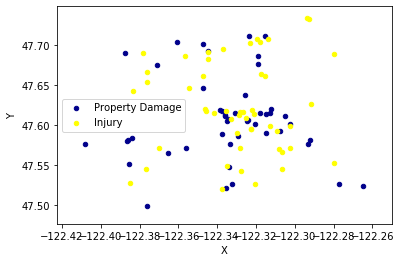

In [56]:
ax = df[df['SEVERITYCODE'] == 1][0:50].plot(kind='scatter', x='X', y='Y', color='DarkBlue', label='Property Damage');
df[df['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='X', y='Y', color='Yellow', label='Injury', ax=ax);
plt.show()

136485 people had property damaged during an accident while 58188 have been injured. 



In [57]:
df[['WEATHER', 'LIGHTCOND', 'ROADCOND']].describe()

,WEATHER,LIGHTCOND,ROADCOND
count,189592,189503,189661
unique,11,9,9
top,Clear,Daylight,Dry
freq,111135,116137,124510


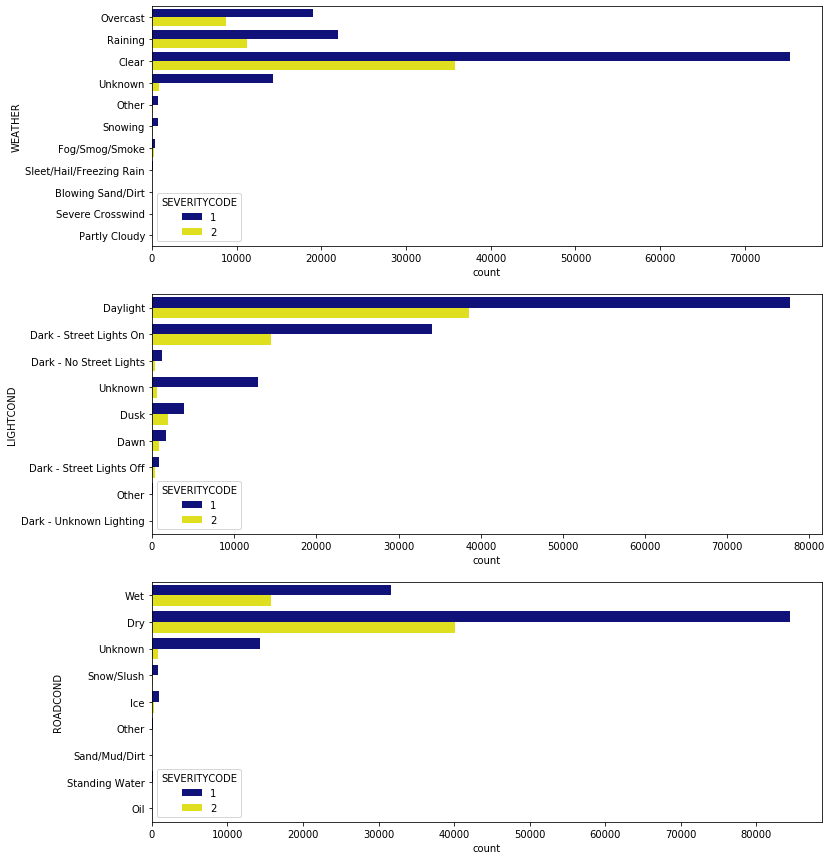

In [58]:
fig, axs = plt.subplots(3,1, figsize = (12,15))
palette = ['DarkBlue',"Yellow"]
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df, ax=axs[0], palette = palette)
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df, ax = axs[1],palette = palette)
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df,palette = palette)

In [59]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [60]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [61]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

### Data Cleaning

Dealing with missing values

In [62]:
df = df[['SEVERITYCODE', 'WEATHER', 'LIGHTCOND', 'ROADCOND']]

In [63]:
for column in df.isnull().columns.values.tolist():
    print(column)
    print (df.isnull()[column].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64



In [64]:
df.dropna(inplace = True)
print(df.shape)

(189337, 4)


In [65]:
print(194673/189337,"< 5% of the values were kept")

1.0281825528026747 < 5% of the values were kept


#### Dealing with irrelevant data

In [66]:
# drop the irrelevant 'WEATHER' values
# df["WEATHER"].replace([np.nan, 'Unknown', 'Other'], "Clear", inplace=True)
# print(df['WEATHER'].value_counts().idxmax())
drop_list = ['Unknown', 'Other'] 
df = df.loc[~df['WEATHER'].isin(drop_list)]
print(df['WEATHER'].value_counts())
print(df.shape)

Clear                       111008
Raining                      33117
Overcast                     27681
Snowing                        901
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
(173474, 4)


In [67]:
# drop the irrelevant 'ROADCOND' values
drop_list = ['Unknown', 'Other'] 
df = df.loc[~df['ROADCOND'].isin(drop_list)]
print(df['ROADCOND'].value_counts())
print(df.shape)

Dry               123276
Wet                46925
Ice                 1113
Snow/Slush           900
Standing Water       108
Sand/Mud/Dirt         65
Oil                   60
Name: ROADCOND, dtype: int64
(172447, 4)


In [68]:
# drop the irrelevant 'LIGHTCOND' values
drop_list = ['Unknown', 'Other', 'Dark - Unknown Lighting'] 
df = df.loc[~df['LIGHTCOND'].isin(drop_list)]
print(df['LIGHTCOND'].value_counts())
print(df.shape)

Daylight                    112618
Dark - Street Lights On      46748
Dusk                          5648
Dawn                          2413
Dark - No Street Lights       1408
Dark - Street Lights Off      1114
Name: LIGHTCOND, dtype: int64
(169949, 4)


In [69]:
print(194673/169949,"< 5% of the values were kept")

1.1454789377989867 < 5% of the values were kept


### Balancing Data

In [70]:
df['SEVERITYCODE'].value_counts()

1    114269
2     55680
Name: SEVERITYCODE, dtype: int64

Note that the data is unbalanced since the count of each attribute differs. 

Proportion: 0.49 : 2


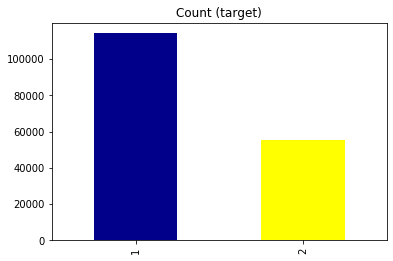

In [71]:
target_count = df['SEVERITYCODE'].value_counts()
color = ['DarkBlue',"Yellow"]

print('Proportion:', round(target_count[2] /target_count[1], 2), ': 2')
target_count.plot(kind='bar', title='Count (target)', color = color);

Random downsampling:
2    55680
1    55680
Name: SEVERITYCODE, dtype: int64


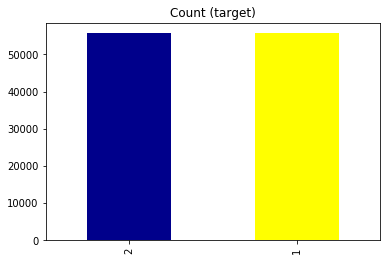

In [72]:
# Divide by class
df_majority  = df[df['SEVERITYCODE'] == 1]
df_minority  = df[df['SEVERITYCODE'] == 2]

df_majority_down = df_majority.sample(target_count[2], random_state = 1)
df_down = pd.concat([df_majority_down, df_minority], axis=0)

print('Random downsampling:')
print(df_down['SEVERITYCODE'].value_counts())

df_down['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (target)', color = color);

In [73]:
df_down.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
27927,1,Clear,Daylight,Dry
150276,1,Overcast,Dark - Street Lights Off,Wet
158118,1,Overcast,Daylight,Wet
172644,1,Clear,Dark - Street Lights On,Dry
147220,1,Clear,Daylight,Dry


In [74]:
df_down = df_down.reset_index(drop=True)
df_down.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,1,Clear,Daylight,Dry
1,1,Overcast,Dark - Street Lights Off,Wet
2,1,Overcast,Daylight,Wet
3,1,Clear,Dark - Street Lights On,Dry
4,1,Clear,Daylight,Dry


In [75]:
print('Unique WEATHER values:\n', set(df['WEATHER']))
print('\nUnique ROADCOND values:\n',set(df['ROADCOND']))
print('\nUnique LIGHTCOND values:\n',set(df['LIGHTCOND']))

Unique WEATHER values:
 {'Severe Crosswind', 'Partly Cloudy', 'Fog/Smog/Smoke', 'Overcast', 'Blowing Sand/Dirt', 'Sleet/Hail/Freezing Rain', 'Clear', 'Raining', 'Snowing'}

Unique ROADCOND values:
 {'Snow/Slush', 'Sand/Mud/Dirt', 'Standing Water', 'Wet', 'Oil', 'Dry', 'Ice'}

Unique LIGHTCOND values:
 {'Dark - No Street Lights', 'Dark - Street Lights On', 'Dawn', 'Dusk', 'Dark - Street Lights Off', 'Daylight'}


In [76]:
features = ['WEATHER', 'ROADCOND','LIGHTCOND']
X = df_down[features].values

# df = pd.concat([df_test_under, dummy_variable_1], axis=1)
X[0:5]

array([['Clear', 'Dry', 'Daylight'],
       ['Overcast', 'Wet', 'Dark - Street Lights Off'],
       ['Overcast', 'Wet', 'Daylight'],
       ['Clear', 'Dry', 'Dark - Street Lights On'],
       ['Clear', 'Dry', 'Daylight']], dtype=object)

### Feature Selection

#### Label Enocoding - Convert Categorical features to numerical values 

In [77]:
from sklearn import preprocessing
weather = preprocessing.LabelEncoder()
weather.fit(['Blowing Sand/Dirt',
 'Clear',
 'Fog/Smog/Smoke',
 'Overcast',
 'Partly Cloudy',
 'Raining',
 'Severe Crosswind',
 'Sleet/Hail/Freezing Rain',
 'Snowing'])
X[:,0] = weather.transform(X[:,0]) 


road = preprocessing.LabelEncoder()
road.fit(['Dry',
 'Ice',
 'Oil',
 'Sand/Mud/Dirt',
 'Snow/Slush',
 'Standing Water',
 'Wet'])
X[:,1] = road.transform(X[:,1])


light = preprocessing.LabelEncoder()
light.fit(['Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Dark - Street Lights On',
 'Dark - Unknown Lighting',
 'Dawn',
 'Daylight',
 'Dusk'])
X[:,2] = light.transform(X[:,2]) 

X[0:5]

array([[1, 0, 5],
       [3, 6, 1],
       [3, 6, 5],
       [1, 0, 2],
       [1, 0, 5]], dtype=object)

#### Normalize Data

In [78]:
# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5]

In [79]:
y = df_down['SEVERITYCODE']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: SEVERITYCODE, dtype: int64

In [80]:
df_graph = df.copy()
df_graph.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,2,Overcast,Daylight,Wet
1,1,Raining,Dark - Street Lights On,Wet
2,1,Overcast,Daylight,Dry
3,1,Clear,Daylight,Dry
4,2,Raining,Daylight,Wet


In [81]:
cleanup_nums = {"WEATHER": {'Partly Cloudy':0, 'Sleet/Hail/Freezing Rain':1, 
                            'Clear':2,'Overcast':3, 'Snowing':4, 
                            'Fog/Smog/Smoke':5,'Severe Crosswind':6, 
                            'Blowing Sand/Dirt':7, 'Raining':8},
                "LIGHTCOND":  {'Dusk':0, 'Dawn':1, 'Dark - No Street Lights':2, 
                               'Dark - Street Lights On':3, 
                               'Dark - Street Lights Off':4, 'Daylight':5},
                "ROADCOND":  {'Sand/Mud/Dirt':0, 'Snow/Slush':1,
                              'Ice':2, 'Wet':3, 'Standing Water':4,
                              'Oil':5, 'Dry':6}}

In [82]:
df_graph.replace(cleanup_nums, inplace=True)
df_graph.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,2,3,5,3
1,1,8,3,3
2,1,3,5,6
3,1,2,5,6
4,2,8,5,3


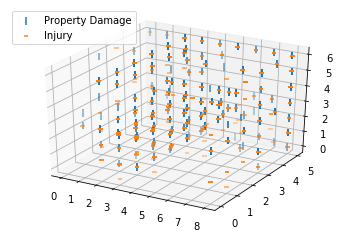

In [83]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#     # X = feature values, all the columns except the last column
#     X = df.iloc[:, :-1]

#     # y = target values, last column of the data frame
#     y = df.iloc[:, -1]

    # filter out the applicants that got admitted
injury = df_graph[df_graph['SEVERITYCODE'] == 1]

    # filter out the applicants that din't get admission
property_damage = df_graph[df_graph['SEVERITYCODE'] == 2]

    # plots
ax.scatter(property_damage.iloc[:, 1], property_damage.iloc[:, 2], property_damage.iloc[:, 3] , s= 60,label='Property Damage', marker = '|')
ax.scatter(injury.iloc[:, 1], injury.iloc[:, 2],injury.iloc[:, 3], label='Injury', marker = '_')
plt.legend()
plt.show()

## Methodology <a name="methodology"></a>

Supervised learning. We are trying to classify labeled data.  

Classification algorithms:  
* K-Nearest Neighbors - classifying the severity based on similar cases


* Decision Trees - mapping out all possible decisions paths to predict the severity of an accident 


* Logistic Regression - used for predicting binary labels. Note there are only 2 classes for severity in our data(i.e, 1 and 2)


* Support Vector Machine - classifies cases by trying to find a seperator (linear, polynomial, rbf or sigmoid)

## Analysis <a name="analysis"></a>

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (89088, 3) (89088,)
Test set: (22272, 3) (22272,)


The best accuracy was with 0.5105962643678161 with k= 12


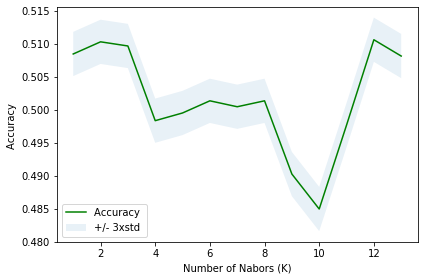

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 14
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [86]:
k=12
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
# print(KNN)
yhat_KNN = KNN.predict(X_test)
print(yhat_KNN [0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_KNN))

[1 2 2 1 2]
Train set Accuracy:  0.5118422234195402
Test set Accuracy:  0.5105962643678161


### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [88]:
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    dt = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=dt.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with d=", mean_acc.argmax()+1)

The best accuracy was with 0.5262661637931034 with d= 6


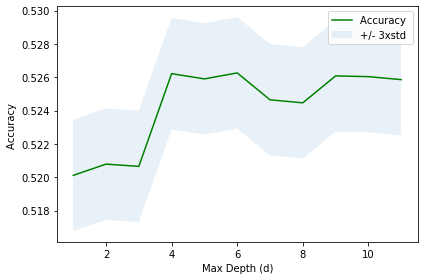

In [89]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth (d)')
plt.tight_layout()
plt.show()

In [90]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
DT.fit(X_train,y_train)
yhat_DT = DT.predict(X_test)
print(yhat_DT [0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DT.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_DT))

[1 2 2 1 2]
Train set Accuracy:  0.5173873024425287
Test set Accuracy:  0.5262212643678161


#### Visualization

In [92]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [93]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\kored\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


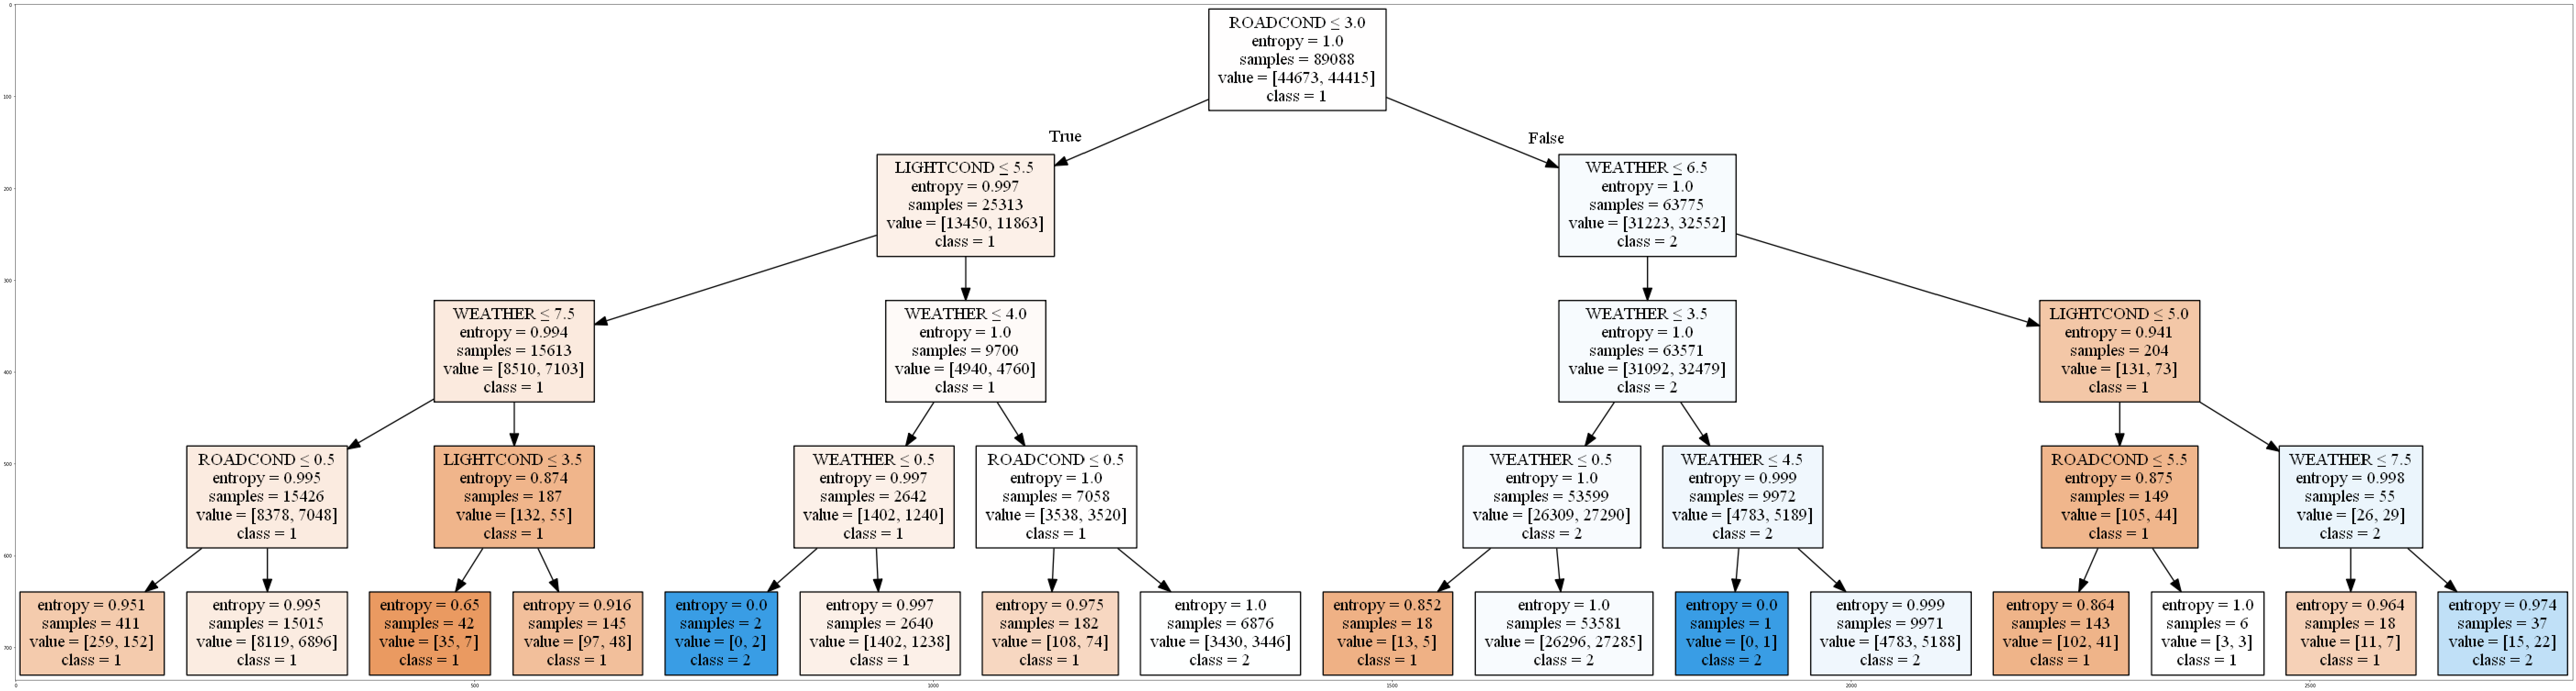

In [94]:
dot_data = StringIO()
filename = "severitytree.png"
featureNames = df.columns[1:5]
targetNames = df["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(DT,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.astype(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Support Vector Machine

In [37]:
# ***this may take a while***
from sklearn import svm
SVM = svm.SVC(kernel='linear', probability = True)
SVM.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
yhat_SVM = SVM.predict(X_test)
print(yhat_SVM [0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_SVM))

[1 2 2 1 2]
Train set Accuracy:  0.5163995150862069
Test set Accuracy:  0.13712284482758622


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
yhat_LR = LR.predict(X_test)
yhat_LR
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

Train set Accuracy:  0.5166352370689655
Test set Accuracy:  0.5199353448275862


K cross-validation will be considered in the future for better training

## Results and Discussion <a name="results"></a>

In [95]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("jaccord - KNN:%.4f" % jaccard_similarity_score(y_test, yhat_KNN))
print("f1_score - KNN: %.4f" % f1_score(y_test, yhat_KNN, average='weighted'))
yhat_prob_KNN = KNN.predict_proba(X_test)
print("log_loss - LR:%.4f" % log_loss(y_test, yhat_prob_KNN))
print('\n')
print("jaccord - DT:%.4f" %jaccard_similarity_score(y_test, yhat_DT))
print("f1_score - DT: %.4f" % f1_score(y_test, yhat_DT, average='weighted'))
yhat_prob_DT = DT.predict_proba(X_test)
print("log_loss - DT:%.4f" % log_loss(y_test, yhat_prob_DT))
print('\n')
print("jaccord - SVM:%.4f" % jaccard_similarity_score(y_test, yhat_SVM))
print("f1_score - SVM:%.4f" % f1_score(y_test, yhat_SVM, average='weighted'))
yhat_prob_SVM = SVM.predict_proba(X_test)
print("log_loss - SVM:%.4f" % log_loss(y_test, yhat_prob_SVM))
print('\n')
print("jaccord - LR:%.4f" %jaccard_similarity_score(y_test, yhat_LR))
print("f1_score - LR:%.4f" % f1_score(y_test, yhat_LR, average='weighted'))
yhat_prob_LR = LR.predict_proba(X_test)
print("log_loss - LR:%.4f" % log_loss(y_test, yhat_prob_LR))

C:\Users\kored\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


jaccord - KNN:0.5106
f1_score - KNN: 0.5075
log_loss - LR:0.7400


jaccord - DT:0.5262
f1_score - DT: 0.4830
log_loss - DT:0.6917




C:\Users\kored\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


NameError: name 'yhat_SVM' is not defined

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.51      0.43      0.46     11007
           2       0.51      0.59      0.55     11265

    accuracy                           0.51     22272
   macro avg       0.51      0.51      0.51     22272
weighted avg       0.51      0.51      0.51     22272

Confusion matrix, without normalization
[[4733 6274]
 [4626 6639]]


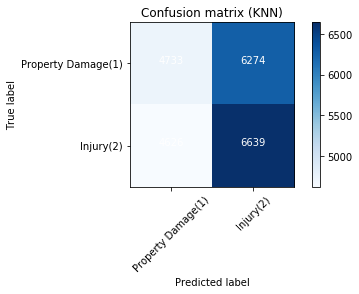

In [97]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=[1,2])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat_KNN))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Confusion matrix (KNN)')

              precision    recall  f1-score   support

           1       0.55      0.23      0.33     11007
           2       0.52      0.81      0.63     11265

    accuracy                           0.53     22272
   macro avg       0.53      0.52      0.48     22272
weighted avg       0.53      0.53      0.48     22272

Confusion matrix, without normalization
[[2579 8428]
 [2124 9141]]


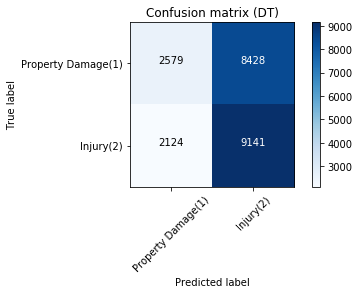

In [98]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=[1,2])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat_DT))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Confusion matrix (DT)')

In [99]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=[1,2])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat_SVM))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Confusion matrix (SVM)')

NameError: name 'yhat_SVM' is not defined

              precision    recall  f1-score   support

           1       0.52      0.31      0.39     11007
           2       0.52      0.72      0.60     11265

    accuracy                           0.52     22272
   macro avg       0.52      0.52      0.50     22272
weighted avg       0.52      0.52      0.50     22272

Confusion matrix, without normalization
[[3434 7573]
 [3119 8146]]


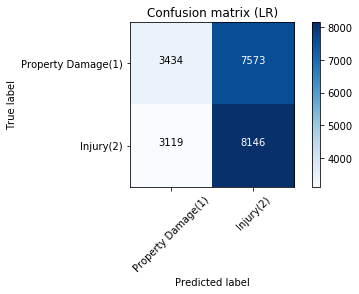

In [100]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat_LR))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury(2)'],normalize= False,  title='Confusion matrix (LR)')

Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.5106  | 0.5075   | 0.7400  |
| Decision Tree      | 0.5262  | 0.4830   | 0.6917  |
| SVM                | 0.5261  | 0.4856   | 0.8091  |
| LogisticRegression | 0.5199  | 0.4986   | 0.6921  |

0 = property damage, 1 = injury. To be consistent with out confusion matrix, we will label the axis as "true negative rate" and "false negative rate"

In [101]:
# 0 = property damage, 1 = injury
y_roc = y_test
y_roc.replace(1,0, inplace = True)
y_roc.replace(2,1, inplace = True)
y_roc[0:5]

40043    0
12049    0
13055    0
3405     0
80199    1
Name: SEVERITYCODE, dtype: int64

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [LR,KNN, DT, SVM]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
#     model = cls.fit(X_train, y_train)
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_roc,  yproba)
    auc = roc_auc_score(y_roc, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

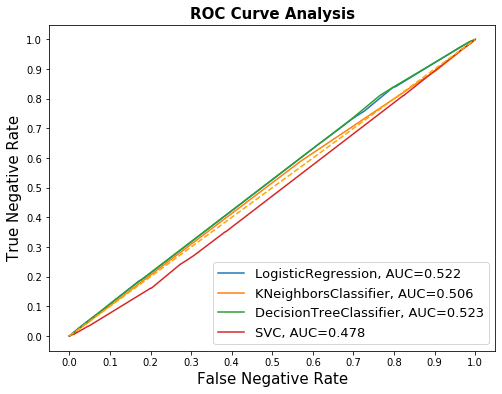

In [103]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Negative Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Negative Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The models for Decision Tree, SVM and Logistic Regression are fairly close. Further looking at the confusion matrix, we see that the models are better at predicting accidents with the severity being an severity. Thus, our **best model is Logistic Regression**. It is computationaly faster, and works well with binary data. Note, if more Severity codes appear in our dataset it is best to go with SVM. 

Note, most of the accidents appear to occur during clear weather, daylight and dry roads. This implies that drivers are less careful during these conditions, and seem to be more careful otherwise. 

## Conclusion <a name="conclusion"></a>

Our analysis has showed that past weather, light condition and road condition data are somewhat significant when predicting future car accidents. Thus, our model somehwhat determines if an accident will occur in Seattle. Further, other features will need to be analysed in order for the model to improve its classifications. 